In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("advertising.csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<AxesSubplot:xlabel='TV', ylabel='Density'>

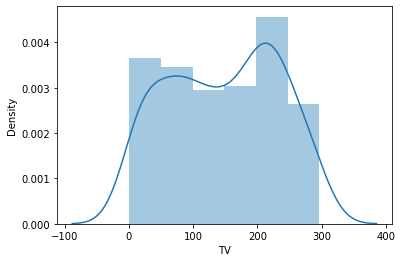

In [6]:
sns.distplot(df.TV)

<AxesSubplot:xlabel='Radio', ylabel='Density'>

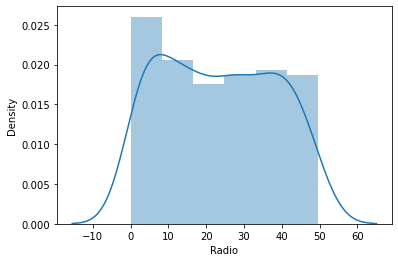

In [7]:
sns.distplot(df.Radio)

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

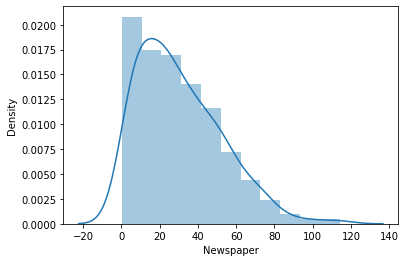

In [8]:
sns.distplot(df.Newspaper)

<AxesSubplot:xlabel='Sales', ylabel='Density'>

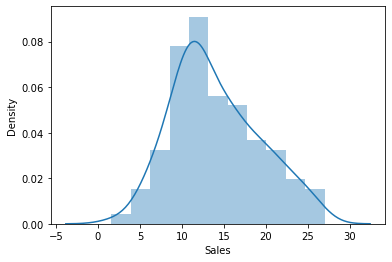

In [9]:
sns.distplot(df.Sales)

In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [12]:
def regression_funct(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [13]:
x,y=df.drop("Sales",axis=1),df[["Sales"]]

In [14]:
x.shape,y.shape

((200, 3), (200, 1))

In [15]:
regression_funct(x,y)

,R_Squared,RMSE,MAE
GradientBoostingRegressor,0.983913,0.712573,0.609245
ExtraTreeRegressor,0.911116,1.674963,1.010000
KNeighborsRegressor,0.910620,1.679625,1.189000
Lasso,0.900401,1.773046,1.452202
ElasticNet,0.899961,1.776959,1.456659
Ridge,0.899438,1.781599,1.460766
LinearRegression,0.899438,1.781600,1.460757


## Deep Learning

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [17]:
x=scaler.fit_transform(x)

In [18]:
x.shape,y.shape

((200, 3), (200, 1))

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [20]:
model=Sequential()
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
tf.keras.layers.BatchNormalization()
model.add(Dense(25, activation='relu'))
model.add(Dense(10, activation='relu'))
tf.keras.layers.BatchNormalization()
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')

In [21]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=10, epochs=1000, verbose=1)

Epoch 1/1000
16/16 [==============================] - 1s 11ms/step - loss: 224.3477 - val_loss: 217.8239
Epoch 2/1000
16/16 [==============================] - 0s 3ms/step - loss: 219.9616 - val_loss: 209.0624
Epoch 3/1000
16/16 [==============================] - 0s 3ms/step - loss: 197.2540 - val_loss: 161.1798
Epoch 4/1000
16/16 [==============================] - 0s 3ms/step - loss: 100.7775 - val_loss: 19.8784
Epoch 5/1000
16/16 [==============================] - 0s 3ms/step - loss: 10.4768 - val_loss: 11.4286
Epoch 6/1000
16/16 [==============================] - 0s 3ms/step - loss: 7.5553 - val_loss: 8.1039
Epoch 7/1000
16/16 [==============================] - 0s 3ms/step - loss: 6.0895 - val_loss: 7.5142
Epoch 8/1000
16/16 [==============================] - 0s 3ms/step - loss: 4.7590 - val_loss: 6.5020
Epoch 9/1000
16/16 [==============================] - 0s 3ms/step - loss: 4.2523 - val_loss: 5.8960
Epoch 10/1000
16/16 [==============================] - 0s 3ms/step - loss: 3.8395 

16/16 [==============================] - 0s 3ms/step - loss: 0.2701 - val_loss: 0.2651
Epoch 83/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.2753 - val_loss: 0.2794
Epoch 84/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.2623 - val_loss: 0.2596
Epoch 85/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.2702 - val_loss: 0.2676
Epoch 86/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.2810 - val_loss: 0.2412
Epoch 87/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.2951 - val_loss: 0.3087
Epoch 88/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.2652 - val_loss: 0.2837
Epoch 89/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.2597 - val_loss: 0.2829
Epoch 90/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.2486 - val_loss: 0.2559
Epoch 91/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.2619 - val_loss: 0.3393
Epoc

16/16 [==============================] - 0s 3ms/step - loss: 0.0776 - val_loss: 0.2248
Epoch 243/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.0735 - val_loss: 0.3169
Epoch 244/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.0762 - val_loss: 0.2310
Epoch 245/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.0816 - val_loss: 0.2174
Epoch 246/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0874 - val_loss: 0.2689
Epoch 247/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0968 - val_loss: 0.3096
Epoch 248/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0904 - val_loss: 0.2478
Epoch 249/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0840 - val_loss: 0.2399
Epoch 250/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0806 - val_loss: 0.2842
Epoch 251/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.0990 - val_loss: 0.

16/16 [==============================] - 0s 3ms/step - loss: 0.0880 - val_loss: 0.2261
Epoch 403/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0811 - val_loss: 0.2643
Epoch 404/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0771 - val_loss: 0.2452
Epoch 405/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0669 - val_loss: 0.2275
Epoch 406/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0772 - val_loss: 0.2144
Epoch 407/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0846 - val_loss: 0.3823
Epoch 408/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0815 - val_loss: 0.2231
Epoch 409/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0756 - val_loss: 0.2634
Epoch 410/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0679 - val_loss: 0.2591
Epoch 411/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0632 - val_loss: 0.

16/16 [==============================] - 0s 4ms/step - loss: 0.0744 - val_loss: 0.1957
Epoch 563/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0763 - val_loss: 0.3189
Epoch 564/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.1172 - val_loss: 0.3379
Epoch 565/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0695 - val_loss: 0.2055
Epoch 566/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0706 - val_loss: 0.2442
Epoch 567/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0707 - val_loss: 0.2619
Epoch 568/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0882 - val_loss: 0.2295
Epoch 569/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0680 - val_loss: 0.2479
Epoch 570/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0674 - val_loss: 0.2310
Epoch 571/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0642 - val_loss: 0.

16/16 [==============================] - 0s 3ms/step - loss: 0.0639 - val_loss: 0.2489
Epoch 723/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0721 - val_loss: 0.2500
Epoch 724/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0686 - val_loss: 0.2536
Epoch 725/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0651 - val_loss: 0.2437
Epoch 726/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0758 - val_loss: 0.2362
Epoch 727/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.0700 - val_loss: 0.2283
Epoch 728/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0574 - val_loss: 0.2368
Epoch 729/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0688 - val_loss: 0.2976
Epoch 730/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0954 - val_loss: 0.2760
Epoch 731/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0767 - val_loss: 0.

16/16 [==============================] - 0s 3ms/step - loss: 0.0588 - val_loss: 0.2703
Epoch 883/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.0874 - val_loss: 0.2398
Epoch 884/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0931 - val_loss: 0.3063
Epoch 885/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0784 - val_loss: 0.2465
Epoch 886/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0989 - val_loss: 0.2437
Epoch 887/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0728 - val_loss: 0.2213
Epoch 888/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0601 - val_loss: 0.2438
Epoch 889/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0674 - val_loss: 0.2304
Epoch 890/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.0614 - val_loss: 0.2302
Epoch 891/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.0823 - val_loss: 0.

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (10, 200)                 800       
_________________________________________________________________
dense_1 (Dense)              (10, 100)                 20100     
_________________________________________________________________
dense_2 (Dense)              (10, 50)                  5050      
_________________________________________________________________
dense_3 (Dense)              (10, 25)                  1275      
_________________________________________________________________
dense_4 (Dense)              (10, 10)                  260       
_________________________________________________________________
dense_5 (Dense)              (10, 4)                   44        
_________________________________________________________________
dense_6 (Dense)              (10, 1)                   5

<AxesSubplot:>

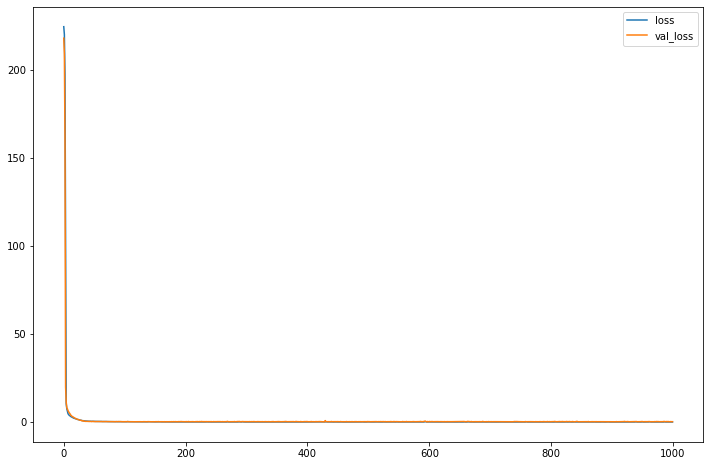

In [23]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [24]:
pred=model.predict(x_test)

In [25]:
(mean_squared_error(y_test,pred))**.5

0.4975822263005971

In [26]:
r2_score(y_test,pred) 

0.9921558972691359